<a href="https://colab.research.google.com/github/vavme/Books-Price-Prediction/blob/main/Book_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn import preprocessing

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Missing value pada genre_0

In [ ]:
# The maximum number of words to be used. (most frequent)
vocab_size = 50000

# Dimension of the dense embedding.
embedding_dim = 128

# Max number of words in each complaint.
max_length = 200

# Truncate and padding options
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
df = pd.read_csv('public-train_prepros.csv')

df_prep = df[df.total_weight == 1]
df_prep_test = df[df.total_weight == 0]

df_prep_test.head()

df_prep = df_prep[['description','genre_0']]
df_prep_test = df_prep_test[['description','genre_0']]

desc = df_prep.description.tolist()

genre = df_prep.genre_0.tolist()

In [ ]:
df = pd.read_csv('public-train_prepros.csv')

In [ ]:
df_train = df[df.total_weight == 1]
df_test = df[df.total_weight == 0]

In [ ]:
df_train = df_train[['description','genre_0']]
df_test = df_test[['description','genre_0']]

In [ ]:
len(set(df_train.genre_0.to_list()))

80

In [ ]:
df_train.head(5)

,description,genre_0
0,"Just after the Second World War, in the small ...",Historical Fiction
1,"Blame it on Hawaii’s rainbows, sparkling beach...",Memoir
2,"The Pulitzer Prize–winning, bestselling author...",Nonfiction
3,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Fantasy
4,The Romanovs were the most successful dynasty ...,History


In [ ]:
print(df_train["description"].to_list()[:5])
original_text = df_train["description"].to_list()[:50]

["Just after the Second World War, in the small English village of Chawton, an unusual but like-minded group of people band together to attempt something remarkable.One hundred and fifty years ago, Chawton was the final home of Jane Austen, one of England's finest novelists. Now it's home to a few distant relatives and their diminishing estate. With the last bit of Austen's legacy threatened, a group of disparate individuals come together to preserve both Jane Austen's home and her legacy. These people—a laborer, a young widow, the local doctor, and a movie star, among others—could not be more different and yet they are united in their love for the works and words of Austen. As each of them endures their own quiet struggle with loss and trauma, some from the recent war, others from more distant tragedies, they rally together to create the Jane Austen Society.", 'Blame it on Hawaii’s rainbows, sparkling beaches, fruity cocktails, and sensuous breezes. For Heather Diamond, there for a su

In [ ]:
#Membersihkan dataset
stemmer = PorterStemmer()

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    # lowercase text
    text = text.lower() 

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    
    # Remove the XXXX values
    text = text.replace('x', '') 
    
    # Remove white space
    text = REMOVE_NUM.sub('', text)

    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('', text) 

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

In [ ]:
df_train["description"] = df_train["description"].apply(clean_text)
df_train["description"].head(5)

0    second world war small english villag chawton ...
1    blame hawaii rainbow sparkl beach fruiti cockt...
2    pulitz prizewin bestsel author warmth sun eami...
3    thing get seriou harri dresden chicago profess...
4    romanov success dynasti modern time rule sith ...
Name: description, dtype: object

In [ ]:
df_train = df_train.sample(frac=1, random_state=123)

In [ ]:
len(np.unique(labels))

80

In [ ]:
#Memastikan dataset yang di split memiliki jumlah y/label unique yang sama
rt = []
for i in range(1,100) :
    X_train, X_test, y_train, y_test = train_test_split(desc ,labels, test_size = 0.1, random_state = i)
    size = len(np.unique(y_train))
    if size == 80 :
        print(size,'random_state',i)
        rt.append(i)

80 random_state 12
80 random_state 33
80 random_state 50
80 random_state 59


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(desc ,labels, test_size = 0.1, random_state = rt[1])

flat_list = list(np.concatenate(y_train).flat)
len(np.unique(y_train))

80

In [ ]:
np.unique(labels)

array(['Adult Fiction', 'Adventure', 'Baseball', 'Biography', 'Birds',
       'Buddhism', 'Business', 'Chick Lit', 'Childrens', 'Christian',
       'Christian Fiction', 'Christmas', 'Comics', 'Contemporary',
       'Contemporary Romance', 'Cookbooks', 'Crime', 'Dark', 'Dragons',
       'Drama', 'Dystopia', 'Economics', 'Erotica', 'Essays', 'Fae',
       'Fantasy', 'Feminism', 'Fiction', 'Finance', 'Food', 'Gardening',
       'Graphic Novels', 'Health', 'Historical Fiction',
       'Historical Romance', 'History', 'Horror', 'Humor', 'LGBT',
       'Leadership', 'M M Romance', 'Manga', 'Memoir', 'Middle Grade',
       'Military Fiction', 'Music', 'Mystery', 'Mystery Thriller',
       'Mythology', 'New Adult', 'Nonfiction', 'Paranormal',
       'Paranormal Romance', 'Parenting', 'Philosophy', 'Picture Books',
       'Poetry', 'Politics', 'Psychology', 'Realistic Fiction',
       'Reverse Harem', 'Romance', 'Romantic Suspense', 'Science',
       'Science Fiction', 'Self Help', 'Short Stori

In [ ]:
len(np.unique(y_train))

80

In [ ]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(3052,) (340,)
(3052, 1) (340, 1)


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
dict(list(word_index.items())[0:10])

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_seq = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print('Shape of data tensor:', train_padded.shape)
print('Shape of data tensor:', validation_padded.shape)

Found 32075 unique tokens.
Shape of data tensor: (3052, 200)
Shape of data tensor: (340, 200)


In [ ]:
encode = OneHotEncoder()

training_labels = encode.fit_transform(y_train)
validation_labels = encode.transform(y_test)

In [ ]:
#Mengatasi Imbalance Data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
train_padded, training_labels = ros.fit_resample(train_padded, training_labels)

C:\Users\Vav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vav\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
print(train_padded.shape)
print(validation_labels.shape)
print(validation_padded.shape)
print(training_labels.shape)
print(type(train_padded))
print(type(validation_padded))
print(type(training_labels))
print(type(validation_labels))

(40480, 200)
(340, 80)
(340, 200)
(40480, 80)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
validation_labels = validation_labels.toarray()

print(type(training_labels))
print(type(validation_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Model Final
model_genre = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(80, activation='softmax')
])
model_genre.summary()

In [ ]:
model_genre.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15

history = model_genre.fit(train_padded, training_labels, shuffle=True ,
                    epochs=epochs, batch_size=batch_size, 
                    validation_split=0.2)


In [ ]:
model_genre.save("my_model_genre1")

NameError: name 'model_genre' is not defined

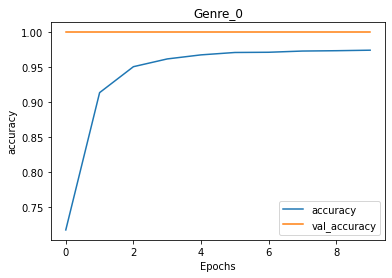

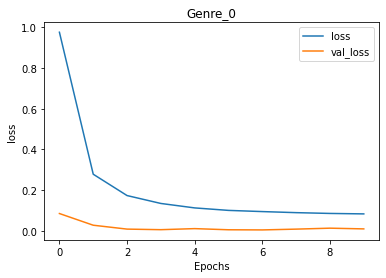

In [ ]:
def plot_graphs(history, string, model):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.title(model)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy", 'Genre_0')
plot_graphs(history, "loss", 'Genre_0')

=======================================================================

In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,genre_0,genre_1,genre_2,genre_3,...,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,total_weight
0,author2106,"Just after the Second World War, in the small ...",Hardcover,309.0,3.76,26625,Historical Fiction,Fiction,Historical,Audiobook,...,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN,1.0
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,4.48,21,Memoir,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,496.0,4.56,59885,Nonfiction,History,Politics,Race,...,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN,1.0
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,418.0,4.39,26643,Fantasy,Urban Fantasy,Fiction,Magic,...,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN,1.0
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,784.0,3.93,11772,History,Nonfiction,Russia,Biography,...,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN,1.0


In [ ]:
df[df['genre_0'].isnull()].index.tolist()

[]

In [ ]:
#Impute Missing value pada genre_0
index_mv_genre_0 = df[df['genre_0'].isnull()].index.tolist()

for i in index_mv_genre_0 :
    df_desc = df["description"].iloc[i]
    df_desc = [clean_text(df_desc)]
    df_desc = tokenizer.texts_to_sequences(df_desc)
    df_desc_padded = pad_sequences(df_desc, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    result_genre = model_genre.predict(df_desc_padded)
    pred = encode.inverse_transform(result_genre)
    df['genre_0'].iloc[i] = str(pred.tolist()[0][0])

AttributeError: 'str' object has no attribute 'values'

In [ ]:
#Check missing value pada genre
df.isnull().sum()

In [ ]:
#Export file pada google collab
from google.colab import files
df.to_csv('Data Preproc_1.csv')
files.download('Data Preproc_1.csv')

Model untuk prediksi Bookformat

In [ ]:
#Data diambil dari google collab karena di google collab dapat dirun menggunakan GPU

In [ ]:
df = pd.read_csv('Data Preproc_1.csv')

In [ ]:
df['bookformat']

0            Hardcover
1            Paperback
2            Hardcover
3            Hardcover
4            Hardcover
             ...      
3507         Paperback
3508         Hardcover
3509         Hardcover
3510    Kindle Edition
3511         Hardcover
Name: bookformat, Length: 3512, dtype: object

In [ ]:
def clean_bf(text):
    text = text.lower() 
    text = text.replace(" ","")
    text = text.replace("  ","")
    return text

In [ ]:
for i in range(0,df.shape[0]) :
    try :
        df['bookformat'][i] = clean_bf(df['bookformat'][i])
    except Exception:
        pass

<ipython-input-797-4529cf4bef2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bookformat'][i] = clean_bf(df['bookformat'][i])


In [ ]:
df['bookformat']

0           hardcover
1           paperback
2           hardcover
3           hardcover
4           hardcover
            ...      
3507        paperback
3508        hardcover
3509        hardcover
3510    kindleedition
3511        hardcover
Name: bookformat, Length: 3512, dtype: object

In [ ]:
df.iloc[:,range(9,28)].columns

Index(['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6',
       'genre_7', 'genre_8', 'genre_9', 'genre_0_weight', 'genre_1_weight',
       'genre_2_weight', 'genre_3_weight', 'genre_4_weight', 'genre_5_weight',
       'genre_6_weight', 'genre_7_weight', 'genre_8_weight', 'genre_9_weight'],
      dtype='object')

In [ ]:
dropped_col = df.iloc[:,range(9,28)].columns

In [ ]:
df = df.drop(dropped_col, axis=1)

In [ ]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [ ]:
df.isnull().sum()

author_id            0
description          0
bookformat           3
pages               71
rating_value_0       0
rating_count_0       0
genre_0              0
price             2979
total_weight         0
dtype: int64

Impute Missing value pada Book Format

In [ ]:
df_bf = df[df.bookformat.notnull()]

In [ ]:
df[df["bookformat"].isnull()]

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,genre_0,price,total_weight
661,author1532,True love can blossom in unexpected places. Th...,NaN,225.0,3.91,18752,Young Adult,NaN,1.0
2054,author1289,Olivia has sworn off men for good this time. H...,NaN,NaN,5.00,4,Poetry,NaN,0.0
3066,author0379,Bestselling authors Brittainy C. Cherry and Ka...,NaN,102.0,4.03,1353,Poetry,NaN,1.0


In [ ]:
df_bf = df_bf[['author_id','genre_0','bookformat']]

In [ ]:
df_bf = df_bf.sample(frac=1, random_state=123)

In [ ]:
df_bf = df_bf.dropna()

In [ ]:
df_bf.shape

(3509, 3)

In [ ]:
bf_x = df_bf[['author_id','genre_0']]
bf_y = df_bf['bookformat']

In [ ]:
bf_genre_0 = len(df_bf.genre_0.unique())

bf_author = len(df_bf.author_id.unique())

bf_bookformat = len(pd.unique(bf_y))

In [ ]:
rt = []
for i in range(1,500) :
    X_train, X_test, y_train, y_test = train_test_split(bf_x ,bf_y, test_size = 0.001, random_state = i)
    size1 = len(X_train.genre_0.unique())
    size2 = len(X_train.author_id.unique())
    size3 = len(pd.unique(y_train))
    if size1 == bf_genre_0 :
        if size2 == bf_author :
            if size3 == bf_bookformat :
                print(size1,size2,size3,'random_state : ',i)
                rt.append(i)

80 2387 12 random_state :  11
80 2387 12 random_state :  34
80 2387 12 random_state :  45
80 2387 12 random_state :  79
80 2387 12 random_state :  100
80 2387 12 random_state :  109
80 2387 12 random_state :  156
80 2387 12 random_state :  196
80 2387 12 random_state :  249
80 2387 12 random_state :  331
80 2387 12 random_state :  354
80 2387 12 random_state :  389
80 2387 12 random_state :  392
80 2387 12 random_state :  437
80 2387 12 random_state :  479
80 2387 12 random_state :  484
80 2387 12 random_state :  493


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bf_x ,bf_y, test_size = 0.001, random_state = rt[0])

In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
X_train

array([['author0312', 'Nonfiction'],
       ['author2219', 'Nonfiction'],
       ['author0543', 'Fantasy'],
       ...,
       ['author1018', 'Memoir'],
       ['author1051', 'Fantasy'],
       ['author0169', 'Cookbooks']], dtype=object)

In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
encode_bf = OneHotEncoder()
y_train = encode_bf.fit_transform(y_train)
y_test = encode_bf.transform(y_test)

In [ ]:
encode_auth_genre = OneHotEncoder()
X_train = encode_auth_genre.fit_transform(X_train)
X_test = encode_auth_genre.transform(X_test)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

C:\Users\Vav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vav\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

(30180, 2467)
(30180, 12)
(4, 2467)
(4, 12)
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()
y_test =  y_test.toarray()

In [ ]:
X_train.shape[1]

2467

In [ ]:
model_bf = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 12, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(12, activation = 'softmax')
])
model_bf.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 12)                29616     
_________________________________________________________________
dense_58 (Dense)             (None, 32)                416       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 12)                396       
Total params: 30,428
Trainable params: 30,428
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_bf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10

history = model_bf.fit(X_train, y_train, shuffle=True ,
                    epochs=epochs, validation_split=0.05)

Epoch 1/10
896/896 [==============================] - 6s 4ms/step - loss: 1.0038 - accuracy: 0.6932 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 2/10
896/896 [==============================] - 3s 4ms/step - loss: 0.3129 - accuracy: 0.8978 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/10
896/896 [==============================] - 4s 4ms/step - loss: 0.1815 - accuracy: 0.9482 - val_loss: 2.2016e-04 - val_accuracy: 1.0000
Epoch 4/10
896/896 [==============================] - 4s 4ms/step - loss: 0.1355 - accuracy: 0.9613 - val_loss: 4.1722e-05 - val_accuracy: 1.0000
Epoch 5/10
896/896 [==============================] - 3s 3ms/step - loss: 0.1179 - accuracy: 0.9649 - val_loss: 1.1921e-05 - val_accuracy: 1.0000
Epoch 6/10
896/896 [==============================] - 3s 3ms/step - loss: 0.1060 - accuracy: 0.9679 - val_loss: 5.6028e-06 - val_accuracy: 1.0000
Epoch 7/10
896/896 [==============================] - 3s 4ms/step - loss: 0.1008 - accuracy: 0.9690 - val_loss: 2.9802e-06 - val_acc

In [ ]:
model_bf.save("my_model_bf1",save_format="h5")

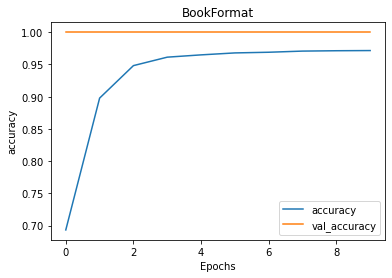

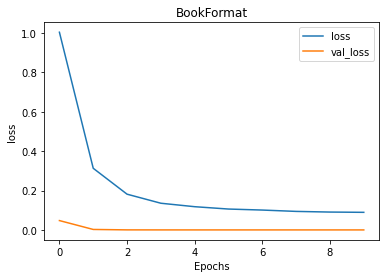

In [ ]:
def plot_graphs(history, string, model):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.title(model)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy", 'BookFormat')
plot_graphs(history, "loss", 'BookFormat')

In [ ]:
plot_model(model_bf, show_shapes=True, show_layer_names=True, expand_nested=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
index_mv_bookformat = df[df['bookformat'].isnull()].index.tolist()

In [ ]:
index_mv_bookformat

[661, 2054, 3066]

In [ ]:
for i in index_mv_bookformat :
    try :
        auth_genre = df[['author_id','genre_0']].iloc[i]
        auth_genre = auth_genre.values.reshape(1,-1)
        auth_genre = encode_auth_genre.transform(auth_genre)
        auth_genre = auth_genre.toarray()
        result_bf = model_bf.predict(auth_genre)
        pred = encode_bf.inverse_transform(result_bf)
        df['bookformat'].iloc[i] = str(pred.tolist()[0][0])
    except Exception:
        pass

C:\Users\Vav\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


==============================================================

In [ ]:
df[['bookformat']] = df[['bookformat']].fillna(value='None')

In [ ]:
df.isnull().sum()

author_id            0
description          0
bookformat           0
pages               71
rating_value_0       0
rating_count_0       0
genre_0              0
price             2979
total_weight         0
dtype: int64

In [ ]:
df.head()

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,genre_0,price,total_weight
0,author2106,"Just after the Second World War, in the small ...",hardcover,309.0,3.76,26625,Historical Fiction,NaN,1.0
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",paperback,NaN,4.48,21,Memoir,NaN,1.0
2,author1087,"The Pulitzer Prize–winning, bestselling author...",hardcover,496.0,4.56,59885,Nonfiction,NaN,1.0
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,hardcover,418.0,4.39,26643,Fantasy,NaN,1.0
4,author2622,The Romanovs were the most successful dynasty ...,hardcover,784.0,3.93,11772,History,NaN,1.0


In [ ]:
df_pages = df[['bookformat','pages']]

In [ ]:
df_pages = df_pages.dropna()

In [ ]:
df_pages.head()

,bookformat,pages
0,hardcover,309.0
2,hardcover,496.0
3,hardcover,418.0
4,hardcover,784.0
5,hardcover,255.0


In [ ]:
df_pages = df_pages.groupby('bookformat').mean()

In [ ]:
df_pages

,pages
bookformat,
None,225.000000
boardbook,26.000000
comics,136.000000
ebook,311.214286
hardcover,345.788156
kindleedition,319.648649
librarybinding,659.000000
massmarketpaperback,379.238095
nook,270.000000


In [ ]:
index_mv_pages = df[df['pages'].isnull()].index.tolist()

In [ ]:
index_mv_pages

[1,
 17,
 46,
 83,
 85,
 89,
 101,
 239,
 290,
 322,
 370,
 375,
 399,
 572,
 630,
 675,
 782,
 802,
 827,
 865,
 879,
 999,
 1029,
 1073,
 1122,
 1128,
 1188,
 1210,
 1233,
 1291,
 1314,
 1332,
 1368,
 1431,
 1513,
 1544,
 1556,
 1629,
 1713,
 1725,
 1835,
 1838,
 1890,
 1949,
 2054,
 2150,
 2158,
 2194,
 2246,
 2291,
 2322,
 2337,
 2354,
 2378,
 2426,
 2476,
 2619,
 2694,
 2826,
 2844,
 2993,
 3186,
 3248,
 3301,
 3312,
 3322,
 3334,
 3357,
 3388,
 3441,
 3510]

Impute Missing Value

In [ ]:
for i in index_mv_pages : 
    if df['bookformat'][i] == 'None' :
        df.loc[i,'pages'] = df_pages.loc['None'][0]
    elif df['bookformat'][i] == 'boardbook' :
        df.loc[i,'pages'] = df_pages.loc['boardbook'][0]
    elif df['bookformat'][i] == 'comics' :
        df.loc[i,'pages'] = df_pages.loc['comics'][0]     
    elif df['bookformat'][i] == 'hardcover' :
        df.loc[i,'pages'] = df_pages.loc['hardcover'][0]    
    elif df['bookformat'][i] == 'kindleedition' :
        df.loc[i,'pages'] = df_pages.loc['kindleedition'][0]     
    elif df['bookformat'][i] == 'librarybinding' :
        df.loc[i,'pages'] = df_pages.loc['librarybinding'][0]
    elif df['bookformat'][i] == 'massmarketpaperback' :
        df.loc[i,'pages'] = df_pages.loc['massmarketpaperback'][0]     
    elif df['bookformat'][i] == 'nook' :
        df.loc[i,'pages'] = df_pages.loc['nook'][0]      
    elif df['bookformat'][i] == 'spiral-boundd' :
        df.loc[i,'pages'] = df_pages.loc['spiral-bound'][0]
    elif df['bookformat'][i] == 'tradepaperback' :
        df.loc[i,'pages'] = df_pages.loc['tradepaperback'][0]     
    elif df['bookformat'][i] == 'unknownbinding' :
        df.loc[i,'pages'] = df_pages.loc['unknownbinding'][0]
    elif df['bookformat'][i] == 'ebook' :
        df.loc[i,'pages'] = df_pages.loc['ebook'][0]  
    elif df['bookformat'][i] == 'paperback' :
        df.loc[i,'pages'] = df_pages.loc['paperback'][0]

=======================================================================

In [ ]:
df.isnull().sum()

author_id            0
description          0
bookformat           0
pages                0
rating_value_0       0
rating_count_0       0
genre_0              0
price             2979
total_weight         0
dtype: int64

In [ ]:
df.to_csv('data_full.csv')

Prediksi Price

In [ ]:
df = df.drop(['description','rating_value_0','rating_count_0','total_weight'],axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df_fin = df.sample(frac=1, random_state=123)
df_fin_x = df_fin[['author_id','bookformat','pages','genre_0']]
df_fin_y = df_fin['price']


In [ ]:
fin_author = len(df_fin_x.author_id.unique())
fin_bf = len(df_fin_x.bookformat.unique())
fin_pages = len(df_fin_x.genre_0.unique())

In [ ]:
rt = []
for i in range(1,100) :
    X_train, X_test, y_train, y_test = train_test_split(df_fin_x ,df_fin_y, test_size = 0.001, random_state = i)
    size1 = len(X_train.author_id.unique())
    size2 = len(X_train.bookformat.unique())
    size3 = len(X_train.genre_0.unique())
    if size1 == fin_author :
        if size2 == fin_bf :
            if size3 == fin_pages :
                print(size1,size2,size3,'random_state : ',i)
                rt.append(i)


478 9 45 random_state :  13
478 9 45 random_state :  32
478 9 45 random_state :  38
478 9 45 random_state :  54
478 9 45 random_state :  55
478 9 45 random_state :  57
478 9 45 random_state :  67
478 9 45 random_state :  71
478 9 45 random_state :  72
478 9 45 random_state :  77
478 9 45 random_state :  79
478 9 45 random_state :  87


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_fin_x ,df_fin_y, test_size = 0.001, random_state = rt[0])

In [ ]:
minmax_y = MinMaxScaler()

In [ ]:
y_train = minmax_y.fit_transform(y_train.values.reshape(-1,1))
y_test = minmax_y.transform(y_test.values.reshape(-1,1))

In [ ]:
minmax = MinMaxScaler()

In [ ]:
X_train_kontinu = minmax.fit_transform(X_train['pages'].values.reshape(-1,1))
X_test_kontinu = minmax.transform(X_test['pages'].values.reshape(-1,1))

In [ ]:
encode_fin_x = OneHotEncoder()

In [ ]:
X_train_kategorik = encode_fin_x.fit_transform(X_train[['author_id','bookformat','genre_0']])
X_test_kategorik = encode_fin_x.transform(X_train[['author_id','bookformat','genre_0']])

In [ ]:
X_train_kontinu.shape[1]

1

In [ ]:
X_train_kategorik.shape[1]

532

In [ ]:
from tensorflow.keras.layers import concatenate

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
# define two sets of inputs
inputA = tf.keras.Sequential([
    Dense(units = 16, input_shape=[X_train_kontinu.shape[1]]),
    Dense(32, activation = 'relu'),
])

inputB = tf.keras.Sequential([
    Dense(units = 32, input_shape=[X_train_kategorik.shape[1]]),
    Dense(64, activation = 'relu'),
])

combinedInput = concatenate([inputA.output, inputB.output])
x = Dense(64, activation="linear")(combinedInput)
x = Dense(128, activation="linear")(x)
x = Dense(256, activation="relu")(x)
x = Dense(256, activation="linear")(x)

In [ ]:
from tensorflow.keras.models import Model

Model Final

In [ ]:
model = Model(inputs=[inputA.input, inputB.input], outputs=x)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['RootMeanSquaredError'])
epochs = 50
history = model.fit( x=[X_train_kontinu, X_train_kategorik], y=y_train, shuffle=True ,
                    epochs=epochs)

Epoch 1/50
17/17 [==============================] - 7s 15ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460
Epoch 2/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394
Epoch 3/50
17/17 [==============================] - 0s 7ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331
Epoch 7/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322
Epoch 8/50
17/17 [==============================] - 0s 5ms/step - loss: 9.7065e-04 - root_mean_squared_error: 0.0312
Epoch 9/50
17/17 [==============================] - 0s 8ms/step - loss: 9.0846e-04 - root_m

In [ ]:
model.save("my_model_final!",save_format="h5")

KeyError: 'val_root_mean_squared_error'

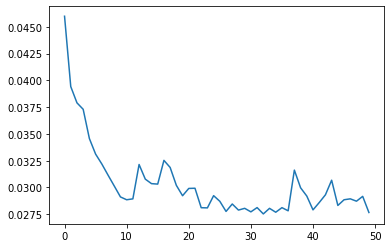

In [ ]:
plot_graphs(history, "root_mean_squared_error", 'Price')
plot_graphs(history, "loss", 'Price')